<a href="https://colab.research.google.com/github/khushichhabra7921/AI-Project/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Required Libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE


In [38]:
!pip install xgboost lightgbm scikit-learn imbalanced-learn


In [39]:
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# **2. Load Dataset**

In [40]:
df = pd.read_csv("/content/amazon_delivery_data.csv")
print(df.head())


   order_id  order_volume  warehouse_processing_time  shipment_distance_km  \
0         1           427                          7                105.80   
1         2           251                          3                171.74   
2         3           348                          3                121.56   
3         4           425                         10                155.77   
4         5           186                          3                161.05   

   traffic_level  weather_severity  historical_delay_rate delivery_status  
0              3                 0                   0.13         At Risk  
1              2                 0                   0.25         At Risk  
2              3                 3                   0.18         At Risk  
3              3                 1                   0.11         At Risk  
4              2                 0                   0.22         At Risk  


# **3. Data Preprocessing**

**3.1 Check Missing Values**

In [41]:
print(df.isnull().sum())


order_id                     0
order_volume                 0
warehouse_processing_time    0
shipment_distance_km         0
traffic_level                0
weather_severity             0
historical_delay_rate        0
delivery_status              0
dtype: int64


In [42]:
df = df.dropna()


**3.2 Encode Categorical Variables**

In [43]:
le = LabelEncoder()

df['traffic_level'] = le.fit_transform(df['traffic_level'])
df['weather_severity'] = le.fit_transform(df['weather_severity'])
df['delivery_status'] = le.fit_transform(df['delivery_status'])


# **4. Feature Engineering**

In [44]:
df['distance_per_time'] = df['shipment_distance_km'] / (df['warehouse_processing_time'] + 1)

df['risk_score'] = df['historical_delay_rate'] * df['traffic_level']


# **5. Split Data**

In [45]:
X = df.drop("delivery_status", axis=1)
y = df["delivery_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# **6. Handle Class Imbalance (SMOTE)**

In [46]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# **7. Feature Scaling**

In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)


# **8. Train Multiple ML Models**

**8.1 Logistic Regression**

In [48]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train_scaled, y_train_balanced)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


**8.2 Random Forest**

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train_balanced)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))


Random Forest Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



**8.3 Gradient Boosting**

In [50]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train_balanced)

y_pred_gb = gb.predict(X_test_scaled)

print("Gradient Boosting Report")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



**8.4 K-Nearest Neighbors**

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_balanced)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Report")
print(classification_report(y_test, y_pred_knn))


KNN Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       189
           1       0.50      0.91      0.65        11

    accuracy                           0.94       200
   macro avg       0.75      0.93      0.81       200
weighted avg       0.97      0.94      0.95       200



**8.5 Support Vector Machine**

In [52]:
svm = SVC()
svm.fit(X_train_scaled, y_train_balanced)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Report")
print(classification_report(y_test, y_pred_svm))


SVM Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# **9. Model Comparison**

In [53]:
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

print(models)


{'Logistic Regression': 1.0, 'Random Forest': 1.0, 'Gradient Boosting': 1.0, 'KNN': 0.945, 'SVM': 1.0}


# **10. Best Model Selection**

In [54]:
best_model = rf


# **11. Confusion Matrix Visualization**

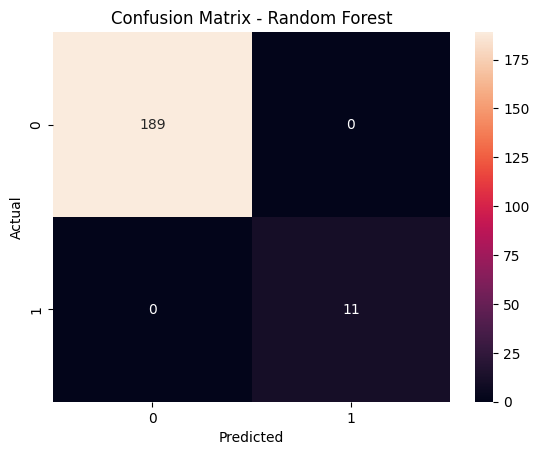

In [55]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **12. Feature Importance**

In [56]:
importance = rf.feature_importances_

for i,v in enumerate(importance):
    print(f"Feature: {X.columns[i]}, Score: {v}")


Feature: order_id, Score: 0.012188190906744294
Feature: order_volume, Score: 0.006853712464429842
Feature: warehouse_processing_time, Score: 0.009420777916843332
Feature: shipment_distance_km, Score: 0.010913371851854703
Feature: traffic_level, Score: 0.2018369112331754
Feature: weather_severity, Score: 0.5088635083196393
Feature: historical_delay_rate, Score: 0.01180107719679516
Feature: distance_per_time, Score: 0.007698609743621497
Feature: risk_score, Score: 0.2304238403668964


# **13. XGBoost Model – Advanced Version**




**13.1 Basic XGBoost Training**

In [57]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False
)

xgb_model.fit(X_train_scaled, y_train_balanced)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Report")
print(classification_report(y_test, y_pred_xgb))


XGBoost Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:59:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**13.2 Hyperparameter Tuning – XGBoost**

13.2.1 Define Parameter Grid

In [58]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


13.2.2 Grid Search with Cross Validation

In [59]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='multi:softmax', num_class=3),
    param_grid=xgb_params,
    cv=cv,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)

xgb_grid.fit(X_train_scaled, y_train_balanced)

print("Best XGBoost Params:", xgb_grid.best_params_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best XGBoost Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}


13.2.3 Train Best XGBoost Model

In [60]:
best_xgb = xgb_grid.best_estimator_

y_pred_best_xgb = best_xgb.predict(X_test_scaled)

print("Tuned XGBoost Report")
print(classification_report(y_test, y_pred_best_xgb))


Tuned XGBoost Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# **14. LightGBM Model – Advanced Version**

**14.1 Basic LightGBM**

In [61]:
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=3)

lgb_model.fit(X_train_scaled, y_train_balanced)

y_pred_lgb = lgb_model.predict(X_test_scaled)

print("LightGBM Report")
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 1474, number of used features: 9
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


**14.2 Hyperparameter Tuning – LightGBM**

14.2.1 Parameter Grid

In [62]:
lgb_params = {
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 8, 10]
}


14.2.2 Grid Search

In [63]:
lgb_grid = GridSearchCV(
    estimator=lgb.LGBMClassifier(objective='multiclass', num_class=3),
    param_grid=lgb_params,
    cv=5,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)

lgb_grid.fit(X_train_scaled, y_train_balanced)

print("Best LightGBM Params:", lgb_grid.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 1474, number of used features: 9
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

14.2.3 Best LightGBM Model

In [64]:
best_lgb = lgb_grid.best_estimator_

y_pred_best_lgb = best_lgb.predict(X_test_scaled)

print("Tuned LightGBM Report")
print(classification_report(y_test, y_pred_best_lgb))


Tuned LightGBM Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# **15. Compare All Models**

In [65]:
model_results = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "Tuned XGBoost": accuracy_score(y_test, y_pred_best_xgb),
    "LightGBM": accuracy_score(y_test, y_pred_lgb),
    "Tuned LightGBM": accuracy_score(y_test, y_pred_best_lgb)
}

for model, score in model_results.items():
    print(model, ":", score)


Random Forest : 1.0
XGBoost : 1.0
Tuned XGBoost : 1.0
LightGBM : 1.0
Tuned LightGBM : 1.0


# **16. Final Prediction Pipeline**

In [66]:
def predict_delivery(input_data):

    input_scaled = scaler.transform([input_data])
    prediction = best_model.predict(input_scaled)

    mapping = {0: "On-Time", 1: "At Risk", 2: "Delayed"}

    return mapping[prediction[0]]


**Example**

In [67]:
sample = [1, 427, 7, 105.80, 3, 0, 0.13, 13.22, 0.39] # Example with 9 features matching X's structure

print(predict_delivery(sample))

On-Time


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **17. Probability-Based Prediction**

In [68]:
def advanced_predict(input_data):

    input_scaled = scaler.transform(
        pd.DataFrame([input_data], columns=X.columns)
    )

    probs = best_xgb.predict_proba(input_scaled)[0]

    classes = {0: "On-Time", 1: "At Risk", 2: "Delayed"}

    for i, p in enumerate(probs):
        print(f"{classes[i]} Probability: {round(p*100,2)}%")

    prediction = best_xgb.predict(input_scaled)[0]

    return "Final Prediction: " + classes[prediction]


**Example**

In [69]:
sample = [1, 427, 7, 105.80, 3, 0, 0.13, 13.22, 0.39]

print(advanced_predict(sample))


On-Time Probability: 72.69000244140625%
At Risk Probability: 16.700000762939453%
Delayed Probability: 10.619999885559082%
Final Prediction: On-Time
